<a href="https://colab.research.google.com/github/ambitama-poddar/Machine-Learning-Practicals/blob/main/DA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ITA6016 Machine Learning**

**Lab Assessment Task - 3**

**Submitted by Ambitama Poddar(22MCA0106)**

# 1. Custom CNN model for predicting brain tumor from scanned image

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/My\ Drive/Colab\ Notebooks/archive.zip

Archive:  drive/My Drive/Colab Notebooks/archive.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/Training',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/Testing',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
model_history = model.fit(
train_generator,
epochs = 30,
validation_data = validation_generator)

Epoch 1/30
90/90 [==============================] - 22s 111ms/step - loss: 1.1235 - accuracy: 0.5875 - val_loss: 1.3082 - val_accuracy: 0.5355
Epoch 2/30
90/90 [==============================] - 9s 98ms/step - loss: 0.4184 - accuracy: 0.8422 - val_loss: 1.4014 - val_accuracy: 0.6701
Epoch 3/30
90/90 [==============================] - 8s 87ms/step - loss: 0.1915 - accuracy: 0.9334 - val_loss: 2.5949 - val_accuracy: 0.6802
Epoch 4/30
90/90 [==============================] - 8s 89ms/step - loss: 0.1065 - accuracy: 0.9627 - val_loss: 3.1534 - val_accuracy: 0.7284
Epoch 5/30
90/90 [==============================] - 9s 97ms/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 2.2154 - val_accuracy: 0.7487
Epoch 6/30
90/90 [==============================] - 9s 95ms/step - loss: 0.0544 - accuracy: 0.9826 - val_loss: 3.3480 - val_accuracy: 0.7360
Epoch 7/30
90/90 [==============================] - 14s 155ms/step - loss: 0.0296 - accuracy: 0.9920 - val_loss: 3.6564 - val_accuracy: 0.7284
Epoch 8/3

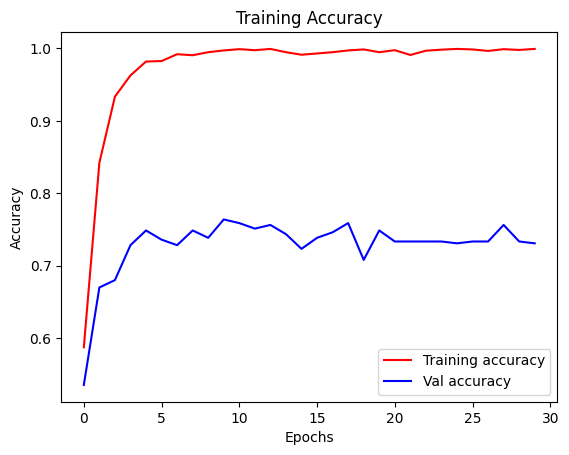

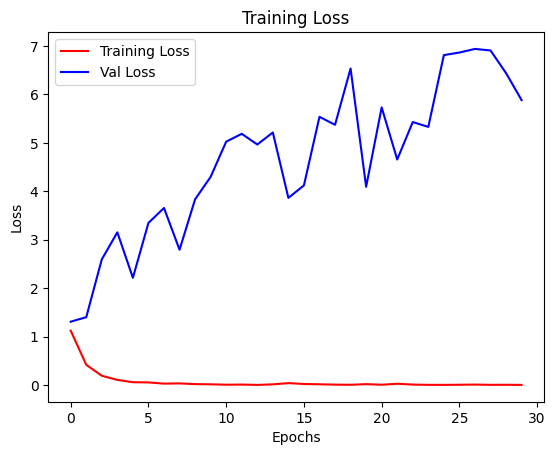

In [ ]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# 2. Using VGGNet model for predicting brain tumor from scanned image

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/Training',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/Testing',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
model = tf.keras.applications.VGG19(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))
#Adding custom Layers
x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
predictions = tf.keras.layers.Dense(4, activation="softmax")(x)
model = tf.keras.Model(inputs = model.input, outputs = predictions)
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

80134624/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model_history = model.fit(
train_generator,
epochs = 30,
validation_data = validation_generator)

Epoch 1/30
90/90 [==============================] - 75s 617ms/step - loss: 3.6854 - accuracy: 0.2969 - val_loss: 1.4437 - val_accuracy: 0.2513
Epoch 2/30
90/90 [==============================] - 44s 491ms/step - loss: 1.3906 - accuracy: 0.3530 - val_loss: 1.4394 - val_accuracy: 0.2132
Epoch 3/30
90/90 [==============================] - 45s 495ms/step - loss: 1.3562 - accuracy: 0.2871 - val_loss: 1.4556 - val_accuracy: 0.1878
Epoch 4/30
90/90 [==============================] - 44s 483ms/step - loss: 1.3848 - accuracy: 0.2930 - val_loss: 1.4157 - val_accuracy: 0.1878
Epoch 5/30
90/90 [==============================] - 43s 476ms/step - loss: 1.3521 - accuracy: 0.2882 - val_loss: 1.4337 - val_accuracy: 0.1878
Epoch 6/30
90/90 [==============================] - 43s 474ms/step - loss: 1.3491 - accuracy: 0.2777 - val_loss: 1.4392 - val_accuracy: 0.2538
Epoch 7/30
90/90 [==============================] - 43s 478ms/step - loss: 1.3485 - accuracy: 0.2875 - val_loss: 1.4397 - val_accuracy: 0.2919

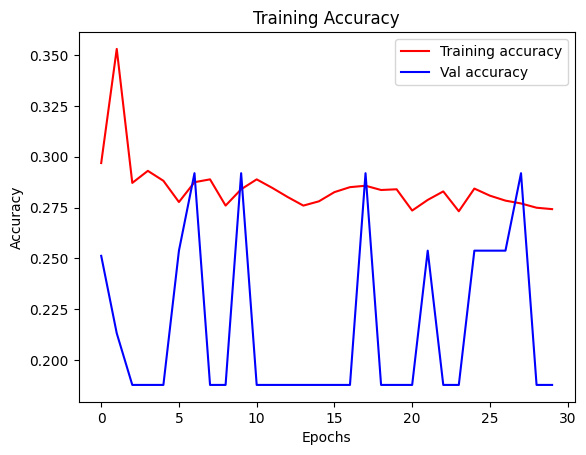

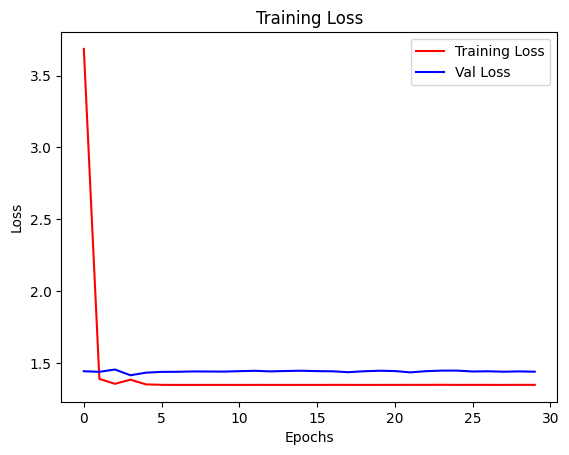

In [ ]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()